PROBLEM STATEMENT

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

Column Profiling:

Serial No. (Unique row ID)
GRE Scores (out of 340)
TOEFL Scores (out of 120)
University Rating (out of 5)
Statement of Purpose and Letter of Recommendation Strength (out of 5)
Undergraduate GPA (out of 10)
Research Experience (either 0 or 1)
Chance of Admit (ranging from 0 to 1)
Problem Statement: Analyse the predictor variables to draw insights about the importance of various factors in prediction of chances of graduate admission and how they are related to each other.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('Jamboree_Admission.csv')

In [5]:
file = data.copy()

In [7]:
file.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
file.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [11]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [13]:
file.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [15]:
file.drop(columns = 'Serial No.',inplace = True)

In [17]:
file.drop_duplicates(keep = 'first')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [19]:
df1 = file

In [21]:
df1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


EXPLORATORY DATA ANALYSIS

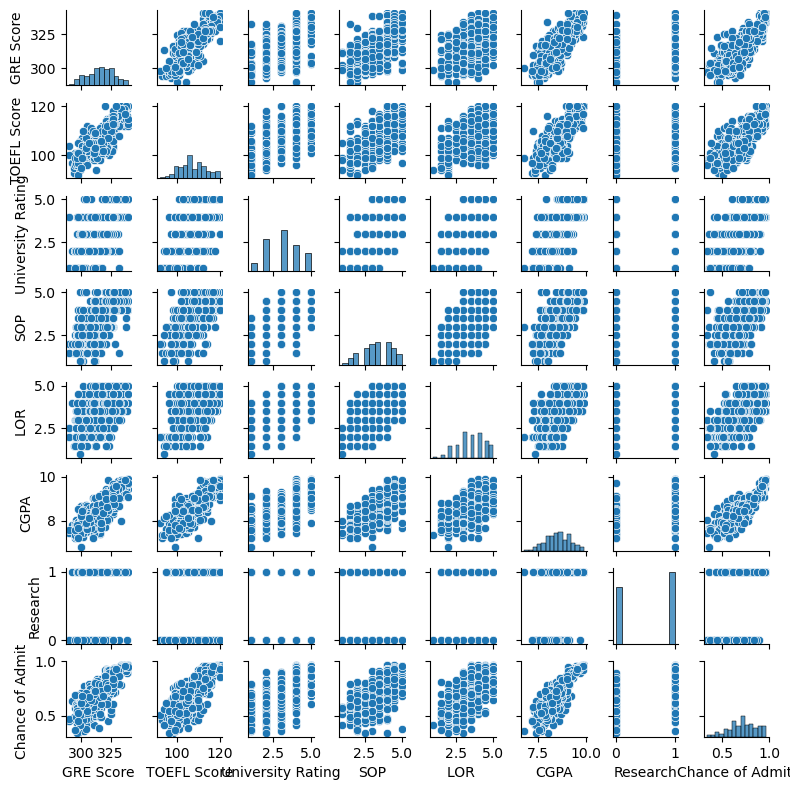

In [24]:
sns.pairplot(df1,height = 1)

University ranking, rating of SOP and LOR have an impact on chances of admit, research doesn't have much of an impact.

Exam scores (GRE, TOEFL and CGPA) have a high positive correlation with chance of admit

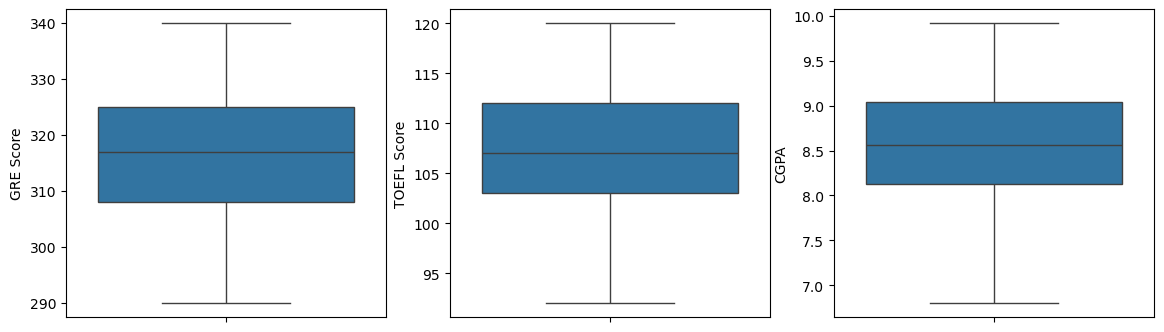

In [28]:
count = 1
plt.figure(figsize=(19,4))
for i in ['GRE Score', 'TOEFL Score','CGPA']:
    plt.subplot(1,4,count)
    sns.boxplot(y= df1[i])
    count += 1

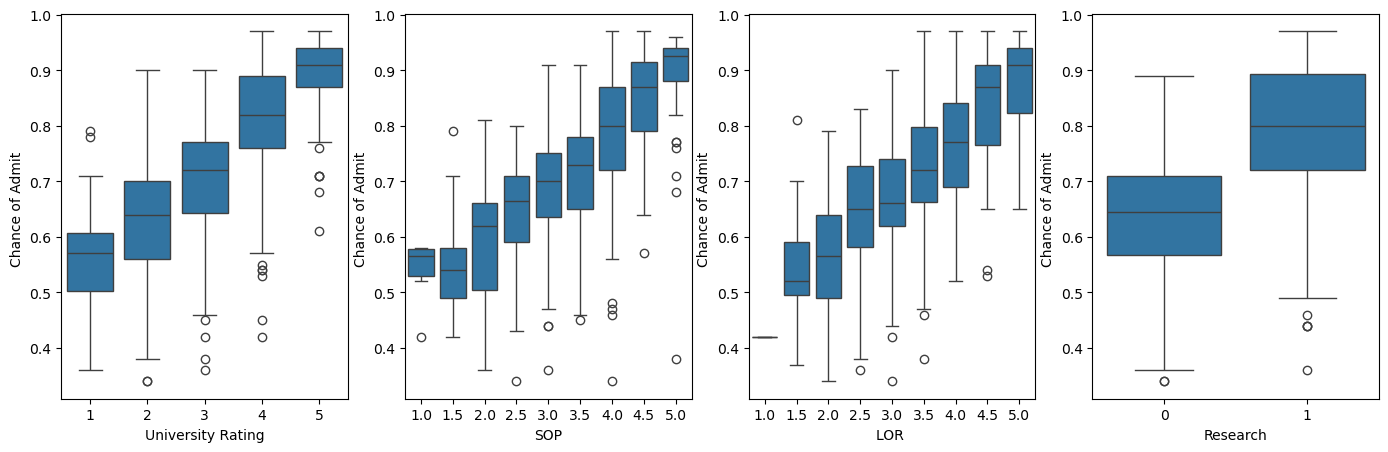

In [30]:
count = 1
plt.figure(figsize=(17,5))
for i in ['University Rating', 'SOP', 'LOR ','Research']:
    plt.subplot(1,4,count)
    sns.boxplot(y =df1['Chance of Admit '], x= df1[i])
    count += 1

<Axes: >

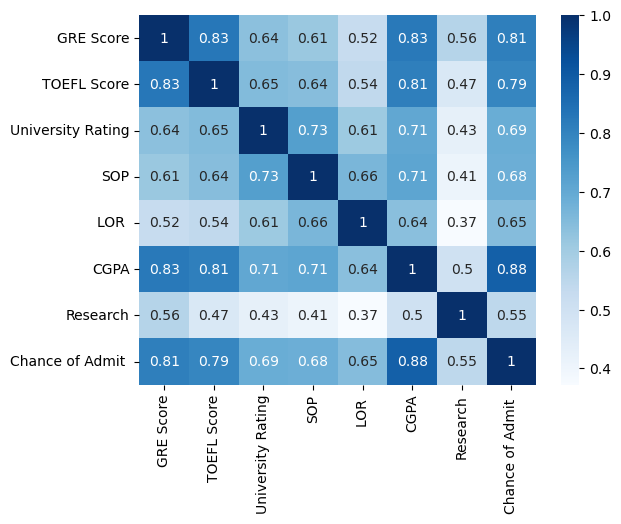

In [32]:
sns.heatmap(df1.corr(), annot=True, cmap='Blues')

Confirming the inferences from pairplot, the correlation matrix also shows that exam scores (CGPA/GRE/TOEFL) have a strong positive correlation with chance of adm.i Infact, they are also highly correlated amongst themselves

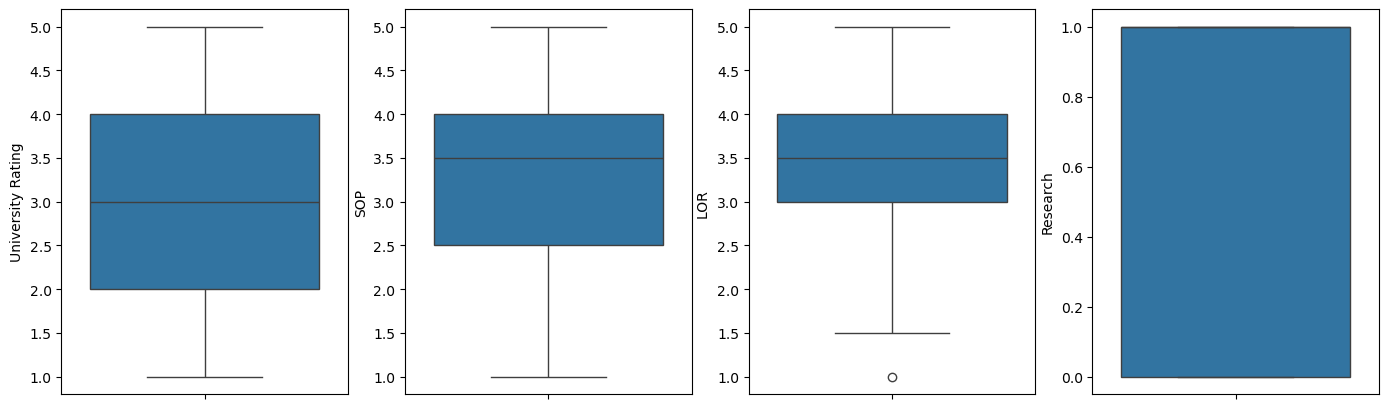

In [35]:
count = 1
plt.figure(figsize=(17,5))
for i in ['University Rating', 'SOP', 'LOR ','Research']:
    plt.subplot(1,4,count)
    sns.boxplot( y= df1[i])
    count += 1

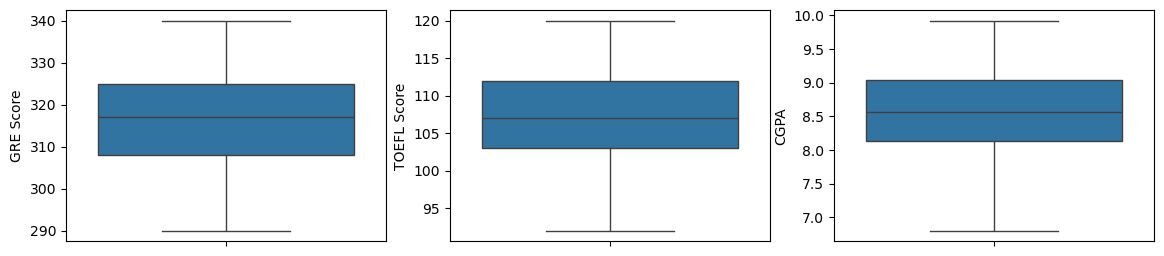

In [37]:
count = 1
plt.figure(figsize=(19,3))
for i in ['GRE Score', 'TOEFL Score','CGPA']:
    plt.subplot(1,4,count)
    sns.boxplot(y = df1[i])
    count += 1

The categorical variables such as university ranking, research, quality of SOP and LOR also increase the chances of admit.

In [40]:
df1[['University Rating', 'SOP', 'LOR ']] = df1[['University Rating', 'SOP', 'LOR ']].astype('category')
df1['Research'] = df1['Research'].astype('bool')

In [42]:
numeric_cols = df1.select_dtypes(include=['float','int']).columns.tolist()
cat_cols = df1.select_dtypes(include=['bool','category']).columns.tolist()

In [44]:
numeric_cols.remove('Chance of Admit ')

In [46]:
x = df1[numeric_cols + cat_cols]
y = df1[['Chance of Admit ']]

In [48]:
x.head()

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
0,337,118,9.65,4,4.5,4.5,True
1,324,107,8.87,4,4.0,4.5,True
2,316,104,8.00,3,3.0,3.5,True
3,322,110,8.67,3,3.5,2.5,True
4,314,103,8.21,2,2.0,3.0,False


In [50]:
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [54]:
x_train.shape

(400, 7)

In [56]:
x_test.shape

(100, 7)

LABEL ENCODING AND STANDARDIZATION

In [59]:
label_encoders = {}
for col in cat_cols:
    label_encoders[col] = LabelEncoder()
for col in cat_cols:
  label_encoders[col].fit(x[col])

In [61]:
for col in cat_cols:
  x_train[col] = label_encoders[col].transform(x_train[col])
  x_test[col] = label_encoders[col].transform(x_test[col])

In [63]:
x_cat_encoded = pd.concat([x_train, x_test])
x_cat_encoded.head()

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
249,321,111,8.83,2,5,6,1
433,316,111,8.54,3,6,8,0
19,303,102,8.50,2,5,4,0
322,314,107,8.27,1,3,6,0
332,308,106,8.21,2,5,3,1


In [65]:
scaler_x = MinMaxScaler()
scaler_x.fit(x_cat_encoded)

MinMaxScaler()

In [67]:
all_cols = x_train.columns

In [69]:
x_train[all_cols]=scaler_x.transform(x_train[all_cols])
x_test[all_cols]=scaler_x.transform(x_test[all_cols])

In [71]:
x_test.head()

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
361,0.88,0.857143,0.878205,0.75,0.750,0.625,1.0
73,0.48,0.571429,0.717949,0.75,0.875,0.750,1.0
374,0.50,0.464286,0.272436,0.25,0.250,0.375,0.0
155,0.44,0.607143,0.605769,0.50,0.500,0.500,0.0
104,0.72,0.714286,0.721154,0.50,0.625,0.500,1.0


In [73]:
model_lr = LinearRegression()

In [75]:
model_lr.fit(x_train, y_train)

LinearRegression()

In [77]:
y_pred_train = model_lr.predict(x_train)
y_pred_test = model_lr.predict(x_test)

In [79]:
def model_evaluation(y_actual, y_forecast, model):
  n = len(y_actual)
  if len(model.coef_.shape)==1:
    p = len(model.coef_)
  else:
    p = len(model.coef_[0])
  MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_forecast),2)
  RMSE = np.round(mean_squared_error(y_true=y_actual,
                                     y_pred=y_forecast, squared=False),2)
  r2 = np.round(r2_score(y_true=y_actual, y_pred=y_forecast),2)
  adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)),2)
  return print(f"MAE: {MAE}\nRMSE: {RMSE}\nR2 Score: {r2}\nAdjusted R2: {adj_r2}")

In [81]:
model_evaluation(y_train.values, y_pred_train, model_lr)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82


C:\Users\nives\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [83]:
model_evaluation(y_test.values, y_pred_test, model_lr)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.81


C:\Users\nives\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Since there is no difference in the loss scores of training and test data, we can conclude that there is no overfitting of the model

Mean Absolute Error of 0.04 shows that on an average, the absolute difference between the actual and predicted values of chance of admit is 4%
Root Mean Square Error of 0.06 means that on an average, the root of squared difference between the actual and predicted values is 6%
R2 Score of 0.82 means that our model captures 82% variance in the data
Adjusted R2 is an extension of R2 which shows how the number of features used changes the accuracy of the prediction

In [86]:
for feature,weight in zip(x_train.columns, model_lr.coef_[0]):
  print(f"Weight of {feature}: {np.round(weight,2)}")

Weight of GRE Score: 0.12
Weight of TOEFL Score: 0.08
Weight of CGPA: 0.35
Weight of University Rating: 0.01
Weight of SOP: 0.01
Weight of LOR : 0.07
Weight of Research: 0.02


In [88]:
model_lr.intercept_

array([0.34696506])

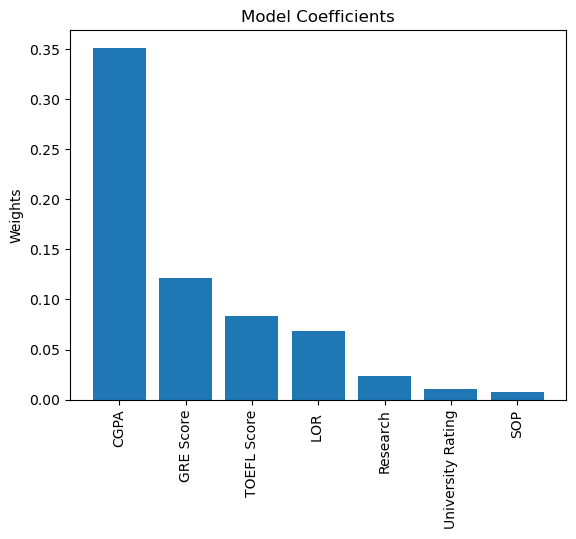

In [90]:
model_weights=list(zip(x_train.columns, model_lr.coef_[0]))
model_weights.sort(key=lambda x:x[1], reverse=True)

features = [i[0] for i in model_weights]
weights = [i[1] for i in model_weights]

plt.bar(x=features, height=weights)
plt.title('Model Coefficients')
plt.ylabel('Weights')
plt.xticks(rotation=90)
plt.show();

CGPA & GRE scores have the highest weight
SOP, University rating, and research have the lowest weights

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Variable'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif

,Variable,VIF
0,GRE Score,31.185925
1,TOEFL Score,26.753950
2,CGPA,41.732265
3,University Rating,10.837374
4,SOP,18.864173
5,LOR,14.657099
6,Research,3.366187


We see that almost all the variables (excluding research) have a very high level of colinearity. This was also observed from the correlation heatmap which showed strong positive correlation between GRE score, TOEFL score and CGPA.

The mean of residuals is useful to assess the overall bias in the regression model. If the mean of residuals is close to zero, it indicates that the model is unbiased on average. However, if the mean of residuals is significantly different from zero, it suggests that the model is systematically overestimating or underestimating the observed values.

In [98]:
residuals = y_test.values - y_pred_test
residuals.reshape((-1,))
print('Mean of Residuals: ', residuals.mean())

Mean of Residuals:  -0.00545362371766134


If a pattern is observed in the residual plot, it may indicate that the linear regression model is not appropriate, and nonlinear regression or other modeling techniques should be considered. Additionally, transformations of variables, adding interaction terms, or using polynomial terms can sometimes help capture nonlinear relationships and improve linearity in the residual plot

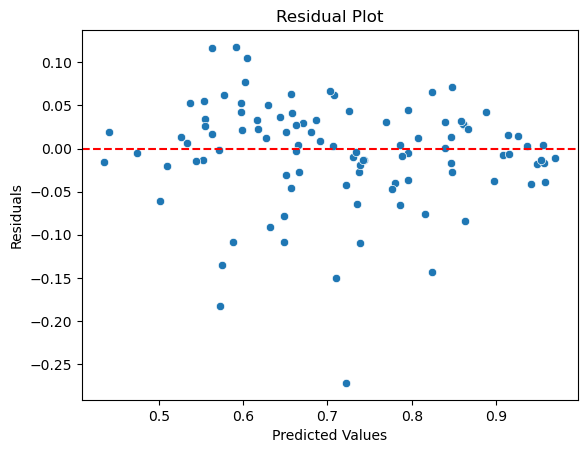

In [101]:
sns.scatterplot(x = y_pred_test.reshape((-1,)), y=residuals.reshape((-1,)))
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show();


Since the residual plot shows no clear pattern or trend in residuals, we can conclude that linearity of variables exists

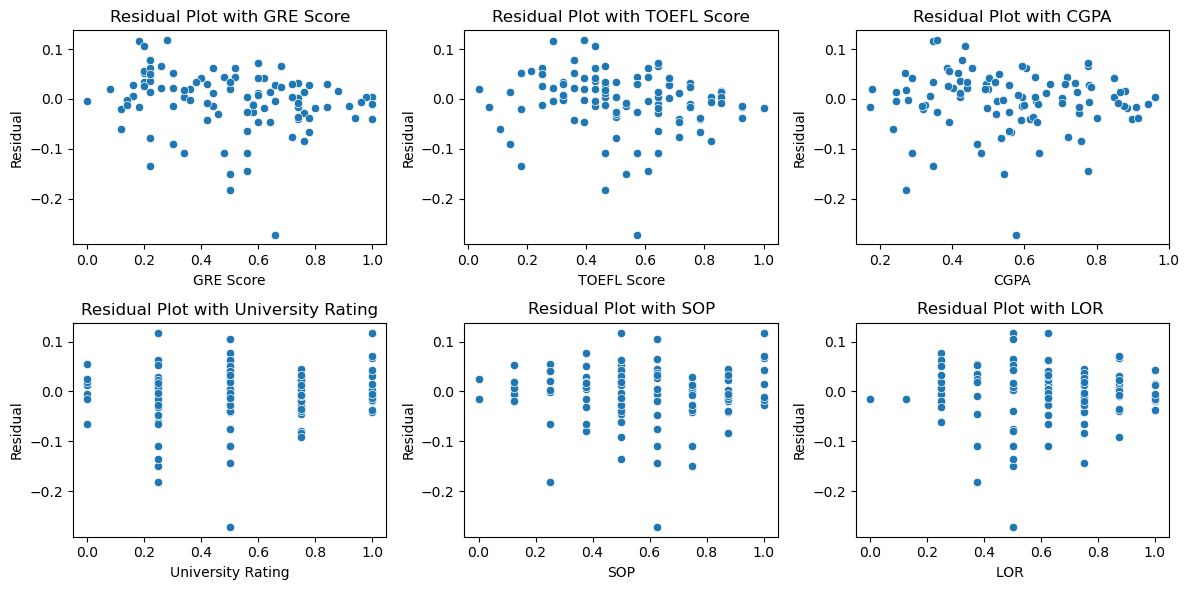

In [104]:
plt.figure(figsize=(12,6))
i=1
for col in x_test.columns[:-1]:
  ax = plt.subplot(2,3,i)
  sns.scatterplot(x=x_test[col].values.reshape((-1,)), y=residuals.reshape((-1,)))
  plt.title(f'Residual Plot with {col}')
  plt.xlabel(col)
  plt.ylabel('Residual')
  i+=1

plt.tight_layout()
plt.show();

Since we do not see any significant change in the spread of residuals with respect to change in independent variables, we can conclude that homoscedasticity is met.

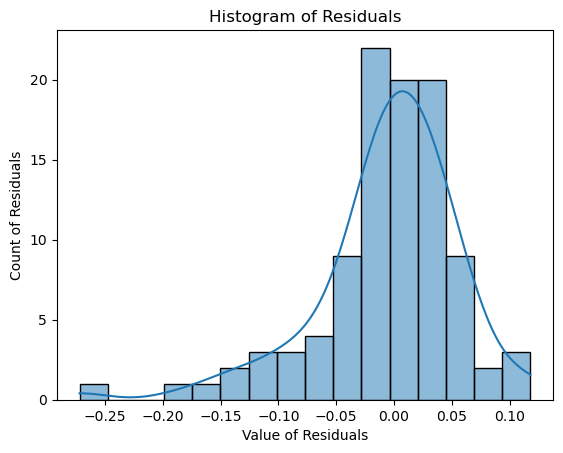

In [107]:
sns.histplot(residuals.reshape((-1,)), kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Value of Residuals')
plt.ylabel('Count of Residuals')
plt.show();

The histogram shows that there is a negative skew in the distribution of residuals but it is close to a normal distribution



In [110]:
model_ridge = Ridge()
model_lasso = Lasso()

In [112]:
model_ridge.fit(x_train, y_train)
model_lasso.fit(x_train, y_train)

Lasso()

In [114]:
y_train_ridge = model_ridge.predict(x_train)
y_test_ridge = model_ridge.predict(x_test)

y_train_lasso = model_lasso.predict(x_train)
y_test_lasso = model_lasso.predict(x_test)

In [116]:
print('Ridge Regression Training Accuracy\n')
model_evaluation(y_train.values, y_train_ridge, model_ridge)
print('\n\nRidge Regression Test Accuracy\n')
model_evaluation(y_test.values, y_test_ridge, model_ridge)
print('\n\nLasso Regression Training Accuracy\n')
model_evaluation(y_train.values, y_train_lasso, model_lasso)
print('\n\nLasso Regression Test Accuracy\n')
model_evaluation(y_test.values, y_test_lasso, model_lasso)

Ridge Regression Training Accuracy

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82


Ridge Regression Test Accuracy

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.81


Lasso Regression Training Accuracy

MAE: 0.11
RMSE: 0.14
R2 Score: 0.0
Adjusted R2: -0.02


Lasso Regression Test Accuracy

MAE: 0.12
RMSE: 0.14
R2 Score: -0.01
Adjusted R2: -0.09


C:\Users\nives\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\nives\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\nives\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\nives\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

While Linear Regression and Ridge regression have similar scores, Lasso regression has not performed well on both training and test data

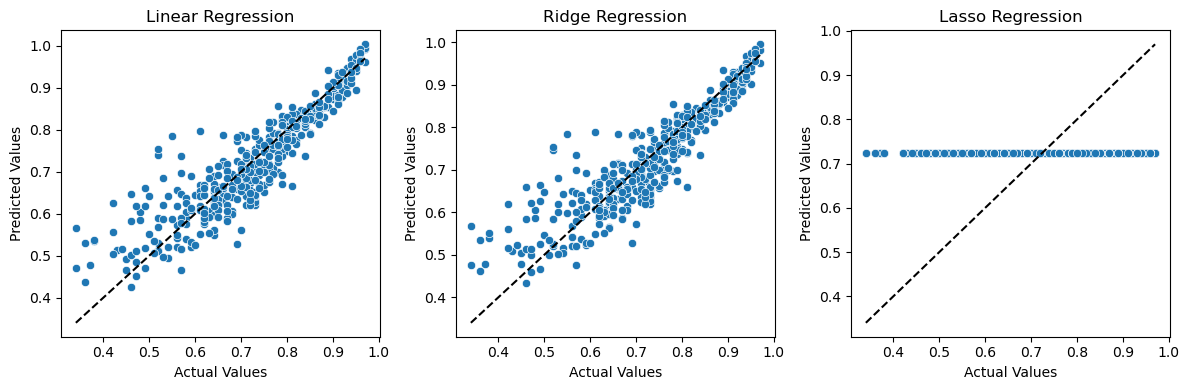

In [119]:
actual_values = y_train.values.reshape((-1,))
predicted_values = [y_pred_train.reshape((-1,)), y_train_ridge.reshape((-1,)), y_train_lasso.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']

plt.figure(figsize=(12,4))
i=1
for preds in predicted_values:
  ax = plt.subplot(1,3,i)
  sns.scatterplot(x=actual_values, y=preds)
  plt.plot([min(actual_values),max(actual_values)], [min(actual_values),max(actual_values)], 'k--')
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title(model[i-1])
  i+=1

plt.tight_layout()
plt.show();

We can observe that both Linear Regression and Ridge Regression have similar accuracy while Lasso regression has oversimplified the model.

This is the reason that the r2 score of Lasso regression is 0. It doesn't capture any variance in the target variable. It has predicted the same value across all instances.

Insights & Recommendations :

Exam scores (CGPA/GRE/TOEFL) have a strong positive correlation with chance of admit. These variables are also highly correlated amongst themselves.

Tthe categorical variables such as university ranking, research, quality of SOP and LOR also show an upward trend for chances of admit

From the model coefficients (weights), we can conclude that CGPA is the most significant predictor variable while SOP/University Rating are the least significant

Both Linear Regression and Ridge Regression models, which are our best models, have captured upto 82% of the variance in the target variable (chance of admit). Due to high colinearity among the predictor variables, it is difficult to achieve better results . Other than multicolinearity, the predictor variables have met the conditions required for Linear Regression - mean of residuals is close to 0, linearity of variables, normality of residuals and homoscedasticity is established..

Recommendations:

Since all the exam scores are highly correlated, it is recommended to add more independent features for better prediction.
Examples of other independent variables could be work experience, internships, mock interview performance, extracurricular activities or diversity variables